# Name : Ahmed Gamal Hamid Zein 
# AI Mansoura

# First, we import the libraries.

In [1]:
import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt 

pd.set_option('display.max_columns', None)


# Load the data:

In [7]:
training_data=pd.read_csv('weatherHistory.csv')

In [8]:
training_data.tail()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.
96452,2016-09-09 23:00:00.000 +0200,Partly Cloudy,rain,20.438889,20.438889,0.61,5.8765,39.0,15.5204,0.0,1016.16,Partly cloudy starting in the morning.


In [9]:
training_data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [10]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [11]:
training_data.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [12]:
# sns.pairplot(training_data, kind="reg")

In [13]:
num_cols=[col for col in training_data.columns if training_data[col].dtype=='float64']

In [14]:
cat_cols=[col for col in training_data.columns if col not in num_cols]

In [15]:
num_cols

['Temperature (C)',
 'Apparent Temperature (C)',
 'Humidity',
 'Wind Speed (km/h)',
 'Wind Bearing (degrees)',
 'Visibility (km)',
 'Loud Cover',
 'Pressure (millibars)']

In [16]:
cat_cols

['Formatted Date', 'Summary', 'Precip Type', 'Daily Summary']

In [17]:
training_data.dropna(inplace=True)

# Converted to DateTime

In [18]:
training_data['Formatted Date']=pd.to_datetime(training_data['Formatted Date'],infer_datetime_format=True,cache=True,utc=True)

In [19]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95936 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Formatted Date            95936 non-null  datetime64[ns, UTC]
 1   Summary                   95936 non-null  object             
 2   Precip Type               95936 non-null  object             
 3   Temperature (C)           95936 non-null  float64            
 4   Apparent Temperature (C)  95936 non-null  float64            
 5   Humidity                  95936 non-null  float64            
 6   Wind Speed (km/h)         95936 non-null  float64            
 7   Wind Bearing (degrees)    95936 non-null  float64            
 8   Visibility (km)           95936 non-null  float64            
 9   Loud Cover                95936 non-null  float64            
 10  Pressure (millibars)      95936 non-null  float64            
 11  Daily Summary  

In [20]:
training_data.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.0,95936.000000
mean,11.940976,10.862531,0.734841,10.804936,187.518773,10.362402,0.0,1003.150038
std,9.570671,10.717812,0.195724,6.920727,107.385351,4.173780,0.0,117.276976
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.604167,2.276389,0.600000,5.796000,116.000000,8.372000,0.0,1011.890000
50%,12.033333,12.033333,0.780000,9.933700,180.000000,10.046400,0.0,1016.420000
75%,18.844444,18.844444,0.890000,14.135800,290.000000,14.812000,0.0,1021.050000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


# Visualizing Data

In [21]:
plt.style.use('ggplot')

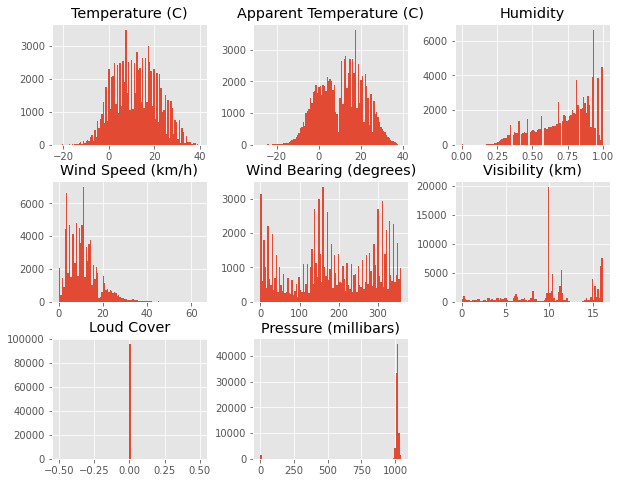

In [22]:
training_data[num_cols].hist(figsize=(10,8),bins=100)
plt.show();

In [23]:
cat_cols

['Formatted Date', 'Summary', 'Precip Type', 'Daily Summary']

In [24]:
num_cols

['Temperature (C)',
 'Apparent Temperature (C)',
 'Humidity',
 'Wind Speed (km/h)',
 'Wind Bearing (degrees)',
 'Visibility (km)',
 'Loud Cover',
 'Pressure (millibars)']

<AxesSubplot:>

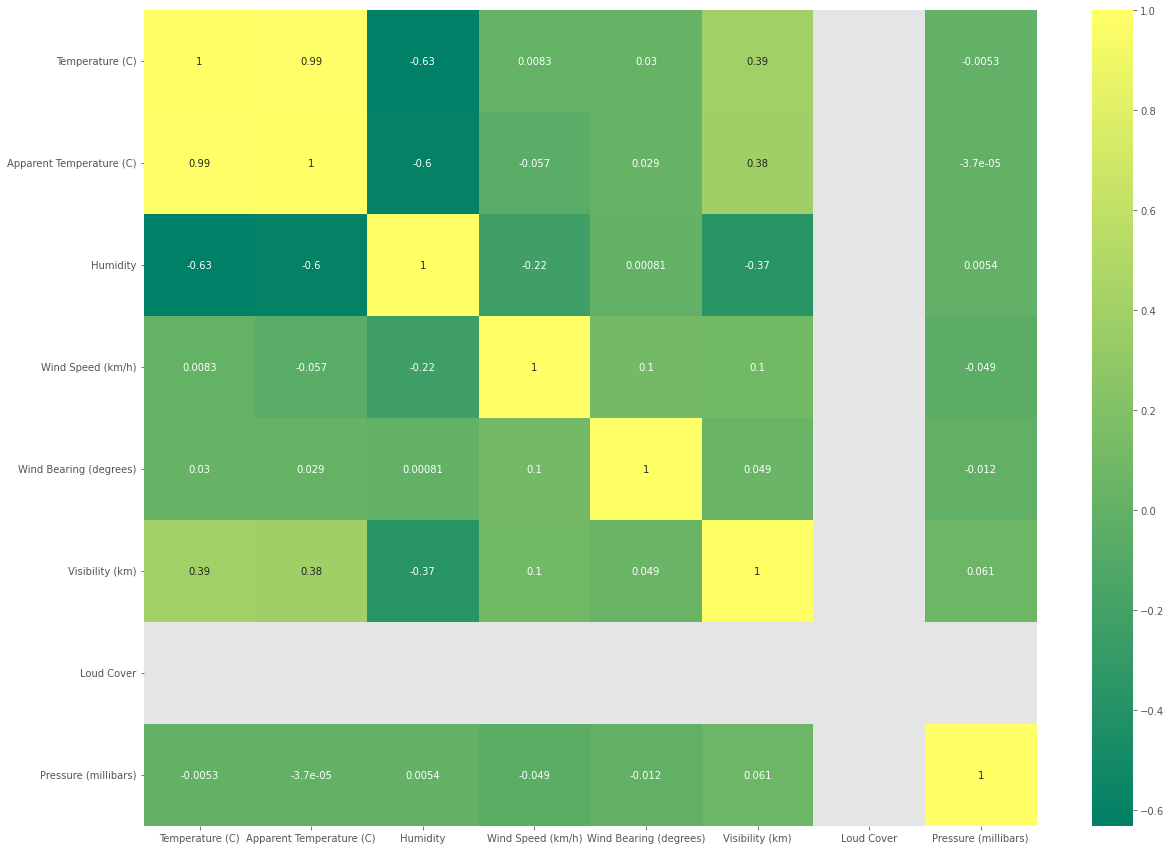

In [25]:
plt.subplots(figsize = (20, 15))
sns.heatmap(training_data.corr(),annot=True,cmap='summer')

# Data Preprocessing

In [26]:
training_data.drop(['Loud Cover'],axis=1,inplace=True)

In [27]:
training_data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.


In [30]:
num_cols=[col for col in training_data.columns if training_data[col].dtype=='float64']

In [31]:
def Skewness(col ,training_data):
    
    std_columns = np.std(training_data[col])
    
    mean_columns = np.mean(training_data[col])
    
    size_rows = training_data.count()[0]
    
    training_data['diff_col'] = training_data[col] - mean_columns
    
    training_data['diff_col_powered'] = np.power(training_data['diff_col'], 3)
    
    skewness = np.sum(training_data['diff_col_powered'])/((size_rows - 1) * np.power(std_columns, 3))
    
    training_data = training_data.drop(columns = ['diff_col_powered', 'diff_col'])
    
    return skewness

def skewed_data_transformation(valu, skewness):
    
    if (skewness >= 1 or skewness <= -1) and valu >= 0:
        
        return np.log( 1 + valu)
    
    else:
        
        return valu
    

In [32]:
for col in num_cols:
    
    skw = Skewness(col, training_data)
    
    training_data[col] = training_data[col].apply(lambda x: skewed_data_transformation(x, skw))

# Shapiro Test to Know distrbution for each feature

In [33]:
from scipy.stats import shapiro

std_scale = []

min_max_scale = []


for i in num_cols:
    
    
    S, p = shapiro( training_data[col])
    
    print('Statistic = %.3f,  p = %.8f'  % (S, p))
    

    gamma = 0.05
    
    if p > gamma:
        
        print(f'{i}   Gaussian (fail to reject )')
        std_scale.append(i)
    else:
        print(f'{i}   not Gaussian (reject )')
        
        min_max_scale.append(i)

Statistic = 0.095,  p = 0.00000000
Temperature (C)   not Gaussian (reject )
Statistic = 0.095,  p = 0.00000000
Apparent Temperature (C)   not Gaussian (reject )
Statistic = 0.095,  p = 0.00000000
Humidity   not Gaussian (reject )
Statistic = 0.095,  p = 0.00000000
Wind Speed (km/h)   not Gaussian (reject )
Statistic = 0.095,  p = 0.00000000
Wind Bearing (degrees)   not Gaussian (reject )
Statistic = 0.095,  p = 0.00000000
Visibility (km)   not Gaussian (reject )
Statistic = 0.095,  p = 0.00000000
Pressure (millibars)   not Gaussian (reject )


C:\Users\Ahmed Zein\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


# Min-max Scaling Numerical Features

In [34]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [35]:
MMS_data=pd.DataFrame()

SC_data=pd.DataFrame() 

MMS = MinMaxScaler()

MMS_model = MMS.fit(training_data[min_max_scale])

MMS_data = pd.DataFrame(MMS_model.transform(training_data[min_max_scale]), columns = min_max_scale)


num_df = MMS_data



In [36]:
num_df .head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,0.506975,0.523486,0.89,0.650988,0.699164,0.983,0.995644
1,0.505085,0.521084,0.86,0.653274,0.721448,0.983,0.995715
2,0.505445,0.553144,0.89,0.382303,0.568245,0.929,0.995759
3,0.487805,0.501947,0.83,0.650733,0.749304,0.983,0.995825
4,0.495365,0.517356,0.83,0.596488,0.721448,0.983,0.995839


# Handling Categorical features

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
training_data.drop(['Daily Summary','Summary','Formatted Date'],axis=1,inplace=True)

In [39]:
training_data['Precip Type']= LabelEncoder().fit_transform(training_data['Precip Type'])

In [40]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95936 entries, 0 to 96452
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Precip Type               95936 non-null  int32  
 1   Temperature (C)           95936 non-null  float64
 2   Apparent Temperature (C)  95936 non-null  float64
 3   Humidity                  95936 non-null  float64
 4   Wind Speed (km/h)         95936 non-null  float64
 5   Wind Bearing (degrees)    95936 non-null  float64
 6   Visibility (km)           95936 non-null  float64
 7   Pressure (millibars)      95936 non-null  float64
 8   diff_col                  95936 non-null  float64
 9   diff_col_powered          95936 non-null  float64
dtypes: float64(9), int32(1)
memory usage: 7.7 MB


In [41]:
last_version_data = num_df.merge(training_data['Precip Type'], right_index = True, left_index = True, how = 'inner')
last_version_data.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Precip Type
0,0.506975,0.523486,0.89,0.650988,0.699164,0.983,0.995644,0
1,0.505085,0.521084,0.86,0.653274,0.721448,0.983,0.995715,0
2,0.505445,0.553144,0.89,0.382303,0.568245,0.929,0.995759,0
3,0.487805,0.501947,0.83,0.650733,0.749304,0.983,0.995825,0
4,0.495365,0.517356,0.83,0.596488,0.721448,0.983,0.995839,0


In [42]:
X=last_version_data.drop(['Temperature (C)'],axis=1).values
y=last_version_data[['Temperature (C)']].values

In [43]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [45]:
X_train.shape

(66793, 7)

In [46]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score 
from sklearn.metrics import accuracy_score ,mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso


# Models

# Liner Regression 

In [47]:
linear_regression = LinearRegression()

In [48]:
linear_regression.fit(X_train, y_train)

y_pred_train=linear_regression.predict(X_train)

y_pred_test=linear_regression.predict(X_test)



In [49]:
print('Train score =:',r2_score(y_train,y_pred_train))

print('Test score =:',r2_score(y_test,y_pred_test))

print('MSE of test_data:',mean_squared_error(y_test,y_pred_test))


Train score =: 0.9903871526251711
Test score =: 0.9902117319162961
MSE of test_data: 0.00023648371828861292


# SVR

In [50]:
lst=['scale', 'auto']

s=0

cf=0

for i in np.arange(0.1, 2, 0.1): 
    
    
    s = s + 3
    
    
    cf = cf +1
    
    for j in lst:
        
        svr = SVR(kernel='linear', degree=s, C=i, gamma=j, coef0 = cf)
        
        svr.fit(X_train, y_train)
        
        y_pred = svr.predict(X_test)
        
        print(f'Score' ,r2_score(y_test, y_pred))
        


C:\Users\Ahmed Zein\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Score 0.9642578648581611


C:\Users\Ahmed Zein\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Score 0.9642578648581611


C:\Users\Ahmed Zein\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Score 0.9685034086640446


C:\Users\Ahmed Zein\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Score 0.9685034086640446


C:\Users\Ahmed Zein\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Score 0.972108816925818


C:\Users\Ahmed Zein\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Score 0.972108816925818


C:\Users\Ahmed Zein\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Score 0.9731673505408344


C:\Users\Ahmed Zein\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Score 0.9731673505408344


C:\Users\Ahmed Zein\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Score 0.9746469114038603


C:\Users\Ahmed Zein\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Score 0.9746469114038603


C:\Users\Ahmed Zein\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Score 0.9771150914436192


C:\Users\Ahmed Zein\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Score 0.9771150914436192


C:\Users\Ahmed Zein\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Score 0.9787733366597687


C:\Users\Ahmed Zein\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Score 0.9787733366597687


C:\Users\Ahmed Zein\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Score 0.9788332950446313


C:\Users\Ahmed Zein\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Score 0.9788332950446313


C:\Users\Ahmed Zein\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Score 0.9787799503105368


C:\Users\Ahmed Zein\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Score 0.9787799503105368


C:\Users\Ahmed Zein\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Score 0.978859481237542


C:\Users\Ahmed Zein\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Score 0.978859481237542


C:\Users\Ahmed Zein\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Score 0.9788165298728715


C:\Users\Ahmed Zein\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Score 0.9788165298728715


C:\Users\Ahmed Zein\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Score 0.9788165298728715


C:\Users\Ahmed Zein\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Score 0.9788165298728715


C:\Users\Ahmed Zein\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Score 0.9788165298728715


C:\Users\Ahmed Zein\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Score 0.9788165298728715


C:\Users\Ahmed Zein\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Score 0.9788165298728715


C:\Users\Ahmed Zein\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Score 0.9788165298728715


C:\Users\Ahmed Zein\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Score 0.9788165298728715


C:\Users\Ahmed Zein\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Score 0.9788165298728715


C:\Users\Ahmed Zein\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Score 0.9788165298728715


C:\Users\Ahmed Zein\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Score 0.9788165298728715


C:\Users\Ahmed Zein\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Score 0.9788165298728715


C:\Users\Ahmed Zein\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Score 0.9788165298728715


C:\Users\Ahmed Zein\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Score 0.9788165298728715


C:\Users\Ahmed Zein\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Score 0.9788165298728715


C:\Users\Ahmed Zein\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Score 0.9788165298728715


C:\Users\Ahmed Zein\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Score 0.9788165298728715


#  last score

In [51]:
svr = SVR(kernel='linear', degree=s,  C=i , gamma =j ,coef0=cf)

svr.fit(X_train, y_train)

y_pred = svr.predict(X_test)

print(f'Score' ,r2_score(y_test, y_pred))

C:\Users\Ahmed Zein\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Score 0.9788165298728715


# Polynomial regression

In [53]:
polynomial_feature=PolynomialFeatures(degree=2)
    
x_poly=polynomial_feature.fit_transform(X_train)
    
polynomial_linear_regression=LinearRegression()
    
polynomial_linear_regression.fit(x_poly,y_train)
    
polynomial_predict=polynomial_linear_regression.predict(x_poly)
    


    

In [54]:
MSE=mean_squared_error(y_train,polynomial_predict)
    
r2s=r2_score(y_train,polynomial_predict)
    

In [55]:
print(f' MSE = :{MSE}     score :{r2s}')

 MSE = :7.401004561567475e-05     score :0.9969233711508437
